# Does the number of languages offered for a title impact the hidden gem score/ various scores?

In [1]:
# Dependencies and Setup
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Study data files
netflix_data_path = "../ed_netflix/netflix_language.csv"

# Read the mouse data and the study results
netflix_data = pd.read_csv(netflix_data_path)
netflix_data

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,IMDb Votes
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...",Swedish,Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,2122065.0,12/12/08 0:00,3/4/21 0:00,205926.0
1,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...",Spanish,Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,2122065.0,12/12/08 0:00,3/4/21 0:00,205926.0
2,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,R,5.8,79.0,69.0,1.0,NaN,70632.0,5/8/20 0:00,3/4/21 0:00,2838.0
3,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,NaN,7.4,NaN,NaN,NaN,NaN,NaN,12/3/20 0:00,3/3/21 0:00,131.0
4,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,7.5,NaN,NaN,2.0,4.0,NaN,6/14/11 0:00,3/3/21 0:00,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14311,13 Going on 30,"Comedy, Fantasy, Romance","Romantic Comedies,Comedies,Romantic Films,Roma...",Portuguese,Movie,3.1,"Hungary,Lithuania,Romania,United Kingdom,Belgi...",1-2 hour,PG-13,6.2,65.0,57.0,NaN,11.0,57231747.0,4/23/04 0:00,4/14/15 0:00,167842.0
14312,LIFE 2.0,Documentary,"Social & Cultural Documentaries,Biographical D...",English,Movie,8.2,"Hungary,Lithuania,India,Australia,United Kingd...",1-2 hour,Not Rated,6.2,89.0,65.0,1.0,NaN,NaN,1/22/10 0:00,4/14/15 0:00,878.0
14313,Brand New Day,"Documentary, Music","Australian Comedies,Romantic Comedies,Australi...",English,Movie,8.6,Australia,1-2 hour,NaN,7.3,NaN,NaN,NaN,NaN,NaN,9/17/88 0:00,4/14/15 0:00,14.0
14314,Daniel Arends: Blessuretijd,Comedy,"Stand-up Comedy,International Movies,Comedies",Dutch,Movie,8.8,Belgium,1-2 hour,NaN,7.8,NaN,NaN,NaN,NaN,NaN,1/13/12 0:00,4/14/15 0:00,174.0


In [2]:
netflix_data.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,IMDb Votes
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...",Swedish,Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,2122065.0,12/12/08 0:00,3/4/21 0:00,205926.0
1,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...",Spanish,Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,2122065.0,12/12/08 0:00,3/4/21 0:00,205926.0
2,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,R,5.8,79.0,69.0,1.0,NaN,70632.0,5/8/20 0:00,3/4/21 0:00,2838.0
3,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,NaN,7.4,NaN,NaN,NaN,NaN,NaN,12/3/20 0:00,3/3/21 0:00,131.0
4,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,7.5,NaN,NaN,2.0,4.0,NaN,6/14/11 0:00,3/3/21 0:00,47.0


In [3]:
netflix_data.tail()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,IMDb Votes
14311,13 Going on 30,"Comedy, Fantasy, Romance","Romantic Comedies,Comedies,Romantic Films,Roma...",Portuguese,Movie,3.1,"Hungary,Lithuania,Romania,United Kingdom,Belgi...",1-2 hour,PG-13,6.2,65.0,57.0,NaN,11.0,57231747.0,4/23/04 0:00,4/14/15 0:00,167842.0
14312,LIFE 2.0,Documentary,"Social & Cultural Documentaries,Biographical D...",English,Movie,8.2,"Hungary,Lithuania,India,Australia,United Kingd...",1-2 hour,Not Rated,6.2,89.0,65.0,1.0,NaN,NaN,1/22/10 0:00,4/14/15 0:00,878.0
14313,Brand New Day,"Documentary, Music","Australian Comedies,Romantic Comedies,Australi...",English,Movie,8.6,Australia,1-2 hour,NaN,7.3,NaN,NaN,NaN,NaN,NaN,9/17/88 0:00,4/14/15 0:00,14.0
14314,Daniel Arends: Blessuretijd,Comedy,"Stand-up Comedy,International Movies,Comedies",Dutch,Movie,8.8,Belgium,1-2 hour,NaN,7.8,NaN,NaN,NaN,NaN,NaN,1/13/12 0:00,4/14/15 0:00,174.0
14315,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",< 30 minutes,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,4/14/15 0:00,71.0


In [4]:
#print data types
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14316 entries, 0 to 14315
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  14316 non-null  object 
 1   Genre                  14291 non-null  object 
 2   Tags                   14260 non-null  object 
 3   Languages              14316 non-null  object 
 4   Series or Movie        14316 non-null  object 
 5   Hidden Gem Score       14306 non-null  float64
 6   Country Availability   14294 non-null  object 
 7   Runtime                14315 non-null  object 
 8   View Rating            10977 non-null  object 
 9   IMDb Score             14308 non-null  float64
 10  Rotten Tomatoes Score  9139 non-null   float64
 11  Metacritic Score       7231 non-null   float64
 12  Awards Received        8692 non-null   float64
 13  Awards Nominated For   10392 non-null  float64
 14  Boxoffice              6702 non-null   float64
 15  Re

In [5]:
# Remove the rows with missing data, if any!
clean_neflix_data_df = netflix_data.dropna(how="any")
netflix_data.count()

Title                    14316
Genre                    14291
Tags                     14260
Languages                14316
Series or Movie          14316
Hidden Gem Score         14306
Country Availability     14294
Runtime                  14315
View Rating              10977
IMDb Score               14308
Rotten Tomatoes Score     9139
Metacritic Score          7231
Awards Received           8692
Awards Nominated For     10392
Boxoffice                 6702
Release Date             14071
Netflix Release Date     14316
IMDb Votes               14306
dtype: int64

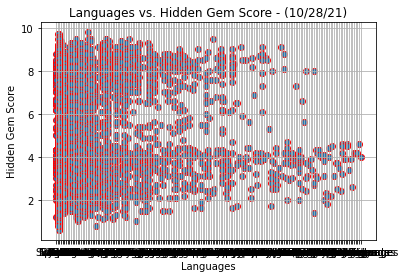

In [6]:
plt.scatter(netflix_data["Languages"], netflix_data["Hidden Gem Score"], alpha=1.0, edgecolor='red')
plt.title(f"Languages vs. Hidden Gem Score - ({time.strftime('%D')})")
plt.xlabel("Languages")
plt.ylabel("Hidden Gem Score")
plt.grid(True)
plt.show()

# Correlation and Regression

In [7]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen

# use the pearson formula and the average calculated above to determin p-value.
# if p-value is close to 1, there is a high degree of correlation between mouse weight and average tumor volume
# if p-value is close to 0, there is no correlation
# if p-value is close to -1 suggests there is negative correlation

correlation_coeff = round(st.pearsonr(netflix_data['Languages'], netflix_data['Hidden Gem Score'])[0], 4)
correlation_coeff

TypeError: unsupported operand type(s) for +: 'float' and 'str'

# Summary Statistics

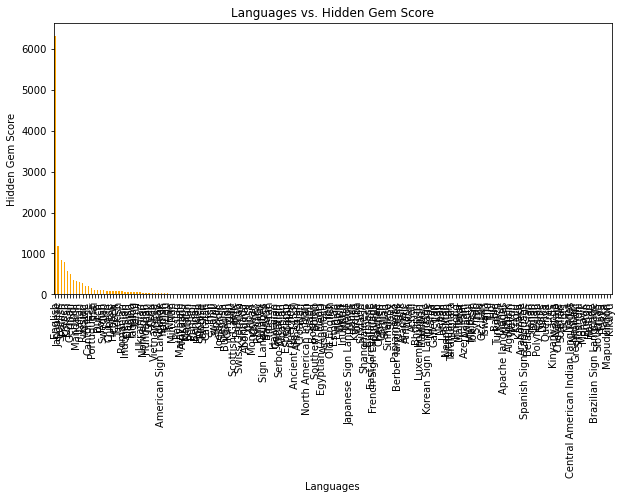

In [8]:
# Generate a bar plot showing the Languages vs. Hidden Gem Score with Pandas.

all_languages = netflix_data.groupby(['Languages'])['Hidden Gem Score'].count().sort_values(ascending = False) 
bar_graph_pandas = all_languages.plot(kind='bar', color='orange', figsize = (10,5))
bar_graph_pandas.set_title('Languages vs. Hidden Gem Score')
bar_graph_pandas.set_xlabel('Languages')
bar_graph_pandas.set_ylabel('Hidden Gem Score')
plt.show()

In [9]:
# Generate a summary statistics table of mean, and median.

# Using the aggregation method, produce the same summary statistics in a single line
netflix_data = netflix_data.groupby(['Languages'])['Hidden Gem Score'].agg(['mean', 'median'])
netflix_data

,mean,median
Languages,,
Ancient (to 1453),3.880000,4.10
Old,4.200000,4.20
Aboriginal,4.837500,3.85
Acholi,5.900000,5.90
Afrikaans,5.635000,6.30
...,...,...
Wolof,6.025000,6.55
Xhosa,5.850000,5.50
Yiddish,5.320833,5.00
